# ASR Assignment 2019-20

This notebook has been provided as a template to get you started on the assignment.  Feel free to use it for your development, or do your development directly in Python.

You can find a full description of the assignment [here](http://www.inf.ed.ac.uk/teaching/courses/asr/2019-20/coursework.pdf).

You are provided with two Python modules `observation_model.py` and `wer.py`.  The first was described in [Lab 3](https://github.com/Ore-an/asr_lab3/blob/master/asr_lab3.ipynb).  The second can be used to compute the number of substitution, deletion and insertion errors between ASR output and a reference text.

It can be used as follows:

```python
import wer

my_refence = 'A B C'
my_output = 'A C C D'

wer.compute_alignment_errors(my_reference, my_output)
```

This produces a tuple $(s,d,i)$ giving counts of substitution,
deletion and insertion errors respectively - in this example (1, 0, 1).  The function accepts either two strings, as in the example above, or two lists.  Matching is case sensitive.

## Template code

Assuming that you have already made a function to generate an WFST, `create_wfst()` and a decoder class, `MyViterbiDecoder`, you can perform recognition on all the audio files as follows:


## Code

In [ ]:
import openfst_python as fst
import math

class MyWFST:
    
    def __init__(self, audio_file_name='recordings/*.wav', lex_file='lexicon.txt', mode='baseline', use_unigram=False, add_silence=False, add_silence_v=1, use_bigram=False, use_trigram=False):
        print("Init ...")
        self.audio_file_name = audio_file_name
        self.lex_file = lex_file
        self.use_unigram = use_unigram
        self.use_bigram = use_bigram
        self.use_trigram = use_trigram
        self.add_silence = add_silence
        self.add_silence_v = add_silence_v
        self.mode = mode
        self.read_lexicon()
        self.init_weights()
        if self.use_unigram:
            self.conduct_unigram()
        if self.use_bigram:
            self.conduct_bigram()
        if self.use_trigram:
            self.conduct_trigram()
    
    def generate(self):
        print("Generating ...")
        return self.generate_word_set_wfst()

    def init_weights(self):
        print("Init weights for WFST ...")
        self.sil_back_weight = fst.Weight('log', -math.log(1))
        self.final_weight = fst.Weight('log', -math.log(1))
        if self.mode == "baseline":
            self.f = fst.Fst()
            self.word_weight = None
            self.back_weight = None
            self.sl_weight = None
            self.next_weight = None
            self.sil_sl_weight = None
            self.sil_next_weight = None
            self.sil_weight = None
            self.final_weight = None
            self.sil_back_weight = None
        elif self.mode == "baseline1":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.1))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.9)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
        elif self.mode == "baseline2":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.5))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.5)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
        elif self.mode == "baseline3":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.3))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.7)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
        elif self.mode == "baseline4":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.7))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.3)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
        elif self.mode == "baseline5":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
        elif self.mode == "baseline6":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.6))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.4)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
        elif self.mode == "baseline7":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.5))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
            self.final_weight = fst.Weight('log', -math.log(0.5))
        elif self.mode == "baseline8":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.8))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
            self.final_weight = fst.Weight('log', -math.log(0.2))
        elif self.mode == "baseline9":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.3))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
            self.final_weight = fst.Weight('log', -math.log(0.7))
        elif self.mode == "baseline10":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.4))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(1))
            self.final_weight = fst.Weight('log', -math.log(0.6))
        elif self.mode == "baseline7-v-1-1":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.5))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.5))
        elif self.mode == "baseline7-v-1-2":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.8))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.2))
        elif self.mode == "baseline7-v-1-3":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.2))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.8))
        elif self.mode == "baseline7-v-1-4":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.1))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.9))
        elif self.mode == "baseline7-v-1-5":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.01))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.99))
        elif self.mode == "baseline7-v-2-3":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.01))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.9))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.1)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.99))
        elif self.mode == "baseline7-v-2-4":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.01))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.99))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.01)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.99))
        elif self.mode == "baseline7-v-1-5-f-1":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.01))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.99))
            self.sil_back_weight = fst.Weight('log', -math.log(0.5))
            self.final_weight = fst.Weight('log', -math.log(0.5))
        elif self.mode == "baseline7-v-1-5-f-2":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.01))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.99))
            self.sil_back_weight = fst.Weight('log', -math.log(0.2))
            self.final_weight = fst.Weight('log', -math.log(0.8))
        elif self.mode == "baseline7-v-1-5-f-3":
            self.f = fst.Fst('log')
            self.word_weight = fst.Weight('log', -math.log(1 / len(self.lex)))  # weight for choosing word
            self.back_weight = fst.Weight('log', -math.log(0.01))  # weight back to start point
            self.sl_weight = fst.Weight('log', -math.log(0.8))  # weight for self-loop
            self.next_weight = fst.Weight('log', -math.log(0.2)) # weight to next state
            self.sil_sl_weight = self.sl_weight
            self.sil_next_weight = self.next_weight
            self.sil_weight = fst.Weight('log', -math.log(0.99))
            self.sil_back_weight = fst.Weight('log', -math.log(0.8))
            self.final_weight = fst.Weight('log', -math.log(0.2))
    
    def conduct_unigram(self):
        print("Conducting unigram ...")
        dic = {}
        for wav_file in glob.glob(self.audio_file_name):
            transcription = read_transcription(wav_file)
            tokens = transcription.split(" ")
            for token in tokens:
                if token not in dic.keys():
                    dic[token] = 1
                else:
                    dic[token] += 1
        self.unigram = dic
        self.unigram_count = dic.copy()
        sum_words_count = sum(dic.values()) 
        for key in self.unigram.keys():
            self.unigram[key] /= sum_words_count
#         print(self.unigram)
    
    def conduct_bigram(self):
        self.conduct_unigram()
        print("Conducting bigram ...")
        dic = {}
        for wav_file in glob.glob(self.audio_file_name):
            transcription = read_transcription(wav_file)
            tokens = transcription.split(" ")
            for i in range(len(tokens) - 1):
                token_bi = (tokens[i], tokens[i+1])
                if token_bi not in dic.keys():
                    dic[token_bi] = 1
                else:
                    dic[token_bi] += 1
        self.bigram = dic
        self.bigram_count = dic.copy()
        for key in self.bigram.keys():
            self.bigram[key] /= self.unigram_count[key[0]]
#         print(self.bigram)
#         print(self.bigram_count)
    
    def conduct_trigram(self):
        self.conduct_bigram()
        print("Conducting trigram ...")
        dic = {}
        for wav_file in glob.glob(self.audio_file_name):
            transcription = read_transcription(wav_file)
            tokens = transcription.split(" ")
            for i in range(len(tokens) - 2):
                token_tri = (tokens[i], tokens[i+1], tokens[i+2])
                if token_tri not in dic.keys():
                    dic[token_tri] = 1
                else:
                    dic[token_tri] += 1
        self.trigram = dic
        self.trigram_count = dic.copy()
        for key in self.trigram.keys():
            self.trigram[key] /= self.bigram_count[(key[0], key[1])]
#         print(self.trigram)
#         print(self.trigram_count)

    def read_lexicon(self):
        # read lexicon
        self.lex = self.parse_lexicon(self.lex_file)
        print("Creating word/phone/state tables ...")
        self.word_table, self.phone_table, self.state_table = self.generate_symbol_tables(self.lex)
        
    def get_lexicon(self):
        return self.lex
    
    def get_tables(self):
        return self.word_table, self.phone_table, self.state_table
    
    def parse_lexicon(self, lex_file):
        """
        Parse the lexicon file and return it in dictionary form.

        Args:
            lex_file (str): filename of lexicon file with structure '<word> <phone1> <phone2>...'
                            eg. peppers p eh p er z

        Returns:
            lex (dict): dictionary mapping words to list of phones
        """

        lex = {}  # create a dictionary for the lexicon entries (this could be a problem with larger lexica)
        with open(lex_file, 'r') as f:
            for line in f:
                line = line.split()  # split at each space
                lex[line[0]] = line[1:]  # first field the word, the rest is the phones
        return lex

    def generate_symbol_tables(self, lexicon, n=3):
        '''
        Return word, phone and state symbol tables based on the supplied lexicon

        Args:
            lexicon (dict): lexicon to use, created from the parse_lexicon() function
            n (int): number of states for each phone HMM

        Returns:
            word_table (fst.SymbolTable): table of words
            phone_table (fst.SymbolTable): table of phones
            state_table (fst.SymbolTable): table of HMM phone-state IDs
        '''

        state_table = fst.SymbolTable()
        phone_table = fst.SymbolTable()
        word_table = fst.SymbolTable()

        # add empty <eps> symbol to all tables
        state_table.add_symbol('<eps>')
        phone_table.add_symbol('<eps>')
        word_table.add_symbol('<eps>')

        for word, phones  in lexicon.items():

            word_table.add_symbol(word)

            for p in phones: # for each phone

                phone_table.add_symbol(p)
                for i in range(1,n+1): # for each state 1 to n
                    state_table.add_symbol('{}_{}'.format(p, i))
                    
        if self.add_silence:
            silence_n = 5
            silence_p = 'sil'
            for i in range(1,silence_n+1):
                state_table.add_symbol('{}_{}'.format(silence_p, i))

        return word_table, phone_table, state_table
        
    def generate_word_set_wfst(self):
        """ generate a HMM to recognise a sentence (assumes 3-state HMMs per phone)

        """

        # create a single start state
        start_state = self.f.add_state()
        self.f.set_start(start_state)
        
        # ! bigram and trigram no longer support add silence version 1 & 2 since 3 is the best !
        if self.add_silence and self.add_silence_v == 2:
            sil_start_state = self.f.add_state()
            sil_end_state = self.generate_phone_wfst_silence(sil_start_state, 'sil', 5)
            self.f.add_arc(sil_end_state, fst.Arc(0, 0, self.sil_back_weight, start_state))
        
        # TODO trigram
        # Just finish trigram LM not the WFST trigram model since it needs the history, left it to be a future work
        
        if self.use_bigram:
            self.bigram_states = {}
            for word in self.lex:
                self.bigram_states[(word, 0)] =  self.f.add_state()
                self.bigram_states[(word, 1)] =  self.f.add_state()
            for word in self.lex:
                for _word in self.lex:
                    pro_bi = fst.Weight('log', -math.log(self.bigram[(word, _word)]))
#                     print(self.bigram_states[(word, 0)])
#                     print(self.bigram_states[(_word, 1)])
                    self.f.add_arc(self.bigram_states[(word, 0)], fst.Arc(0, 0, pro_bi, self.bigram_states[(_word, 1)]))
#             print(self.bigram_states)

        for word in self.lex:

            # we need to add an empty arc from the start state to where the actual phone HMM
            # will begin.  If you can't see why this is needed, try without it!
            current_state = self.f.add_state()
            
            if self.use_unigram is True or self.use_bigram is True or self.use_trigram is True:
                if word not in self.unigram.keys():
                    print("Sth went wrong")
                else:
                    unigram_pro = self.unigram[word]
                    self.word_weight = fst.Weight('log', -math.log(unigram_pro))
            self.f.add_arc(start_state, fst.Arc(0, 0, self.word_weight, current_state))
            
            if self.use_bigram:
                self.f.add_arc(self.bigram_states[(word, 1)], fst.Arc(0, 0,  fst.Weight('log', -math.log(1)), current_state))

            end_state = self.generate_word_wfst_helper(current_state, word, 3)
            
            if not self.use_bigram:
                self.f.add_arc(end_state, fst.Arc(0, 0, self.back_weight, start_state))
            else:
                self.f.add_arc(end_state, fst.Arc(0, 0, self.back_weight, self.bigram_states[(word, 0)]))
            
            if self.add_silence and self.add_silence_v == 2:
                self.f.add_arc(end_state, fst.Arc(0, 0, self.sil_weight, sil_start_state))
                
            if self.add_silence and self.add_silence_v == 3:
                current_state = self.f.add_state()
                self.f.add_arc(end_state, fst.Arc(0, 0, self.sil_weight, current_state))
                end_state = self.generate_phone_wfst_silence(current_state, 'sil', 5)
                
                if not self.use_bigram:
                    self.f.add_arc(end_state, fst.Arc(0, 0, self.sil_back_weight, start_state))
                else:
                    self.f.add_arc(end_state, fst.Arc(0, 0, self.sil_back_weight, self.bigram_states[(word, 0)]))
            
            self.f.set_final(end_state, self.final_weight)
            
        if self.add_silence and self.add_silence_v == 1:
            current_state = self.f.add_state()
            self.f.add_arc(start_state, fst.Arc(0, 0, self.sil_weight, current_state))
            end_state = self.generate_phone_wfst_silence(current_state, 'sil', 5)
            self.f.add_arc(end_state, fst.Arc(0, 0, self.sil_back_weight, start_state))
            
        self.f.set_input_symbols(self.state_table)
        self.f.set_output_symbols(self.phone_table)
        
        return self.f
    
    def generate_word_wfst_helper(self, start_state, word, n):
        """ Generate a WFST for any word in the lexicon, composed of 3-state phone WFSTs.
            This will currently output word labels.  
            Exercise: could you modify this function and the one above to output a single phone label instead?

        Returns:
            the constructed WFST

        """

        current_state = start_state

        # iterate over all the phones in the word
        for i in range(len(self.lex[word])):   # will raise an exception if word is not in the lexicon

            current_state = self.generate_phone_wfst_output_word(current_state, self.lex[word][i], 3, i is (len(self.lex[word])-1), word)

            # note: new current_state is now set to the final state of the previous phone WFST

        return current_state
    
    def generate_phone_wfst_output_word(self, start_state, phone, n, is_final_phone, word):
        """
        Generate a WFST representating an n-state left-to-right phone HMM

        Returns:
            the final state of the FST
        """

        current_state = start_state

        for i in range(1, n+1):

            in_label = self.state_table.find('{}_{}'.format(phone, i))

            # self-loop back to current state
            self.f.add_arc(current_state, fst.Arc(in_label, 0, self.sl_weight, current_state))

            # transition to next state

            # we want to output the phone label on the final state
            # note: if outputting words instead this code should be modified
            if is_final_phone and i == n:
                out_label = self.word_table.find(word)
            else:
                out_label = 0   # output empty <eps> label

            next_state = self.f.add_state()
            self.f.add_arc(current_state, fst.Arc(in_label, out_label, self.next_weight, next_state))    

            current_state = next_state

        return current_state
    
    def generate_phone_wfst_silence(self, start_state, phone, n):
        """
        Generate a WFST representating an n-state left-to-right phone HMM

        Returns:
            the final state of the FST
        """

        current_state = start_state

        for i in range(1, n+1):

            in_label = self.state_table.find('{}_{}'.format(phone, i))

            # self-loop back to current state
            self.f.add_arc(current_state, fst.Arc(in_label, 0, self.sil_sl_weight, current_state))

            # transition to next state

            out_label = 0   # output empty <eps> label

            next_state = self.f.add_state()
            self.f.add_arc(current_state, fst.Arc(in_label, out_label, self.sil_next_weight, next_state))    

            current_state = next_state

        return current_state


In [ ]:
import observation_model
import math
from operator import itemgetter

class MyViterbiDecoder:
    
    NLL_ZERO = 1e10  # define a constant representing -log(0).  This is really infinite, but approximate
                     # it here with a very large number
    
    def __init__(self, f, audio_file_name, lex, word_table, phone_table, state_table, add_pruning=False, pruning_theshold=NLL_ZERO, beam_search=False, beam_width=0):
        """Set up the decoder class with an audio file and WFST f
        """
        self.om = observation_model.ObservationModel()
        self.f = f
        
        if audio_file_name:
            self.om.load_audio(audio_file_name)
        else:
            self.om.load_dummy_audio()
        
        self.initialise_decoding()
        
        self.lex = lex
        self.word_table = word_table
        self.phone_table = phone_table
        self.state_table = state_table
        self.add_pruning = add_pruning
        self.pruning_theshold = pruning_theshold
        self.beam_search = beam_search
        self.beam_width = beam_width
        
    def initialise_decoding(self):
        """set up the values for V_j(0) (as negative log-likelihoods)
        
        """
        
        self.V = []   # stores likelihood along best path reaching state j
        self.B = []   # stores identity of best previous state reaching state j
        self.W = []   # stores output labels sequence along arc reaching j - this removes need for 
                      # extra code to read the output sequence along the best path
        
        for t in range(self.om.observation_length()+1):
            self.V.append([self.NLL_ZERO]*self.f.num_states())
            self.B.append([-1]*self.f.num_states())
            self.W.append([[] for i in range(self.f.num_states())])  #  multiplying the empty list doesn't make multiple
        
        # The above code means that self.V[t][j] for t = 0, ... T gives the Viterbi cost
        # of state j, time t (in negative log-likelihood form)
        # Initialising the costs to NLL_ZERO effectively means zero probability    
        
        # give the WFST start state a probability of 1.0   (NLL = 0.0)
        self.V[0][self.f.start()] = 0.0
        
        # some WFSTs might have arcs with epsilon on the input (you might have already created 
        # examples of these in earlier labs) these correspond to non-emitting states, 
        # which means that we need to process them without stepping forward in time.  
        # Don't worry too much about this!  
        self.traverse_epsilon_arcs(0)        
        
    def traverse_epsilon_arcs(self, t):
        """Traverse arcs with <eps> on the input at time t
        
        These correspond to transitions that don't emit an observation
        
        We've implemented this function for you as it's slightly trickier than
        the normal case.  You might like to look at it to see what's going on, but
        don't worry if you can't fully follow it.
        
        """
        
        states_to_traverse = list(self.f.states()) # traverse all states
        while states_to_traverse:
            
            # Set i to the ID of the current state, the first 
            # item in the list (and remove it from the list)
            i = states_to_traverse.pop(0)   
        
            # don't bother traversing states which have zero probability
            if self.V[t][i] == self.NLL_ZERO:
                    continue
        
            for arc in self.f.arcs(i):
                
                if arc.ilabel == 0:     # if <eps> transition
                  
                    j = arc.nextstate   # ID of next state  
                
                    if self.V[t][j] > self.V[t][i] + float(arc.weight):
                        
                        # this means we've found a lower-cost path to
                        # state j at time t.  We might need to add it
                        # back to the processing queue.
                        self.V[t][j] = self.V[t][i] + float(arc.weight)
                        
                        # save backtrace information.  In the case of an epsilon transition, 
                        # we save the identity of the best state at t-1.  This means we may not
                        # be able to fully recover the best path, but to do otherwise would
                        # require a more complicated way of storing backtrace information
                        self.B[t][j] = self.B[t][i] 
                        
                        # and save the output labels encountered - this is a list, because
                        # there could be multiple output labels (in the case of <eps> arcs)
                        if arc.olabel != 0:
                            self.W[t][j] = self.W[t][i] + [arc.olabel]
                        else:
                            self.W[t][j] = self.W[t][i]
                        
                        if j not in states_to_traverse:
                            states_to_traverse.append(j)

    
    def forward_step(self, t):
        
        if self.beam_search:
            
            V_list = [self.V[t-1][i] for i in self.f.states()]
            beam = [i for i, v in sorted(enumerate(V_list), key=itemgetter(1))][:self.beam_width]
            
            for i in  beam:
                 self.forward_step_per_state(t, i)
            
        else:
          
            for i in self.f.states():

                if not self.V[t-1][i] == self.NLL_ZERO:   # no point in propagating states with zero probability

                    if (self.add_pruning and self.V[t-1][i] < self.pruning_theshold) or not self.add_pruning:

                        self.forward_step_per_state(t, i)


    def forward_step_per_state(self, t, i):
        
        for arc in self.f.arcs(i):

            if arc.ilabel != 0: # <eps> transitions don't emit an observation
                j = arc.nextstate
                tp = float(arc.weight)  # transition prob
                ep = -self.om.log_observation_probability(self.f.input_symbols().find(arc.ilabel), t)  # emission negative log prob
                prob = tp + ep + self.V[t-1][i] # they're logs
                self.counter += 1
                if prob < self.V[t][j]:
                    self.V[t][j] = prob
                    self.B[t][j] = i

                    # store the output labels encountered too
                    if arc.olabel !=0:
                        self.W[t][j] = [arc.olabel]
                    else:
                        self.W[t][j] = []
        
                            
    
    def finalise_decoding(self):
        """ this incorporates the probability of terminating at each state
        """
        
        for state in self.f.states():
            final_weight = float(self.f.final(state))
            if self.V[-1][state] != self.NLL_ZERO:
                if final_weight == math.inf:
                    self.V[-1][state] = self.NLL_ZERO  # effectively says that we can't end in this state
                else:
                    self.V[-1][state] += final_weight
                    
        # get a list of all states where there was a path ending with non-zero probability
        finished = [x for x in self.V[-1] if x < self.NLL_ZERO]
        if not finished:  # if empty
            print("No path got to the end of the observations.")
        
        
    def decode(self):
        self.initialise_decoding()
        self.counter = 0
        t = 1
        while t <= self.om.observation_length():
            self.forward_step(t)
            self.traverse_epsilon_arcs(t)
            t += 1
        self.finalise_decoding()
    
    def backtrace(self):
        
        best_final_state = self.V[-1].index(min(self.V[-1])) # argmin
        best_state_sequence = [best_final_state]
        best_out_sequence = []
        
        t = self.om.observation_length()   # ie T
        j = best_final_state
        
        while t >= 0:
            i = self.B[t][j]
            best_state_sequence.append(i)
            best_out_sequence = self.W[t][j] + best_out_sequence  # computer scientists might like
                                                                                # to make this more efficient!

            # continue the backtrace at state i, time t-1
            j = i  
            t-=1
            
        best_state_sequence.reverse()
        
        # convert the best output sequence from FST integer labels into strings
        best_out_sequence = ' '.join([ self.word_table.find(label) for label in best_out_sequence])
        
        return (best_state_sequence, best_out_sequence)
        

In [ ]:
import glob
import os
import wer
import observation_model
import openfst_python as fst
# ... (add your code to create WFSTs and Viterbi Decoder)

def read_transcription(wav_file):
    """
    Get the transcription corresponding to wav_file.
    """
    
    transcription_file = os.path.splitext(wav_file)[0] + '.txt'
    
    with open(transcription_file, 'r') as f:
        transcription = f.readline().strip()
    
    return transcription

In [ ]:
def test_baseline(f_baseline, mode, lex, word_table, phone_table, state_table, add_pruning=False, pruning_theshold=0.0, beam_search=False, beam_width=0):
    
    print("Testing - "+ mode)
    calculate_states_and_arcs(f_baseline)

    error_list = []
    words_count_list = []
    forward_computations_list = []

    for wav_file in glob.glob('recordings/*.wav'):
        
        print(wav_file)

        decoder = MyViterbiDecoder(f_baseline, wav_file, lex, word_table, phone_table, state_table, add_pruning, pruning_theshold, beam_search, beam_width)

        decoder.decode()
        (state_path, words) = decoder.backtrace()  # you'll need to modify the backtrace() from Lab 4
                                                   # to return the words along the best path

        transcription = read_transcription(wav_file)
        error_counts = wer.compute_alignment_errors(transcription, words)
        print("transcription: " + transcription)
        print("words: " + words)
        word_count = len(transcription.split())

        print(error_counts, word_count)     # you'll need to accumulate these to produce an overall Word Error Rate
        wer_result = sum(error_counts) / word_count
        print("WER: "+ str(wer_result))
        print("The number of forward computations: "+ str(decoder.counter))
        
        error_list.append(sum(error_counts))
        words_count_list.append(word_count)
        forward_computations_list.append(decoder.counter)

    print("Total errors: "+ str(sum(error_list)))
    print("Words number: "+ str(sum(words_count_list)))
    print("Total WER: "+ str(sum(error_list) / sum(words_count_list)))
    print("The number of forward computations per wav: "+ str(sum(forward_computations_list) / len(forward_computations_list)))
    
    return error_list, words_count_list, forward_computations_list


In [ ]:
def calculate_states_and_arcs(f):
    states = len([i for i in f_baseline.states()])
    arcs = 0
    for i in f.states():
        arcs += len([j for j in f.arcs(i)])
    print("States number: "+ str(states))
    print("Arcs number: "+ str(arcs))
    return states, arcs

In [ ]:
def save_list(l, name):
    with open(name, 'w') as f:
        for e in l:
            f.write('%s\n' % str(e))

In [ ]:
# https://piazza.com/class/k41jc04cfd85kb?cid=79
import subprocess
def output_wfst(name, wfst):
    with open(f'{name}.pdf', "w+") as outfile:
        wfst.draw(f'{name}.gv', portrait=True)
        subprocess.call(['dot', '-Tpdf', f'{name}.gv'], stdout=outfile)

## Experiments
- Baseline: Baseline
- Other Experiment - baseline* (is not baseline even if the name starts with baseline)

### Baseline

Init ...
Creating word/phone/state tables ...
Init weights for WFST ...
Generating ...


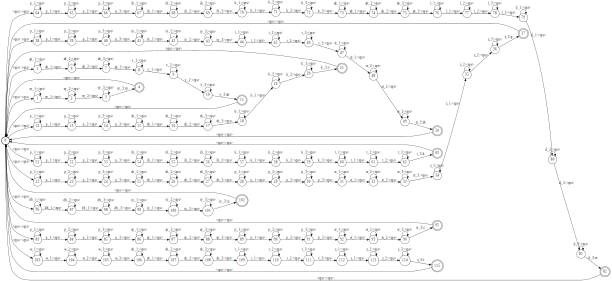

In [ ]:
wfst = MyWFST(mode='baseline')
wfst.generate()

In [ ]:
wfst = MyWFST(mode='baseline')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
output_wfst('baseline', f_baseline)

- Testing - baseline
- States number: 116
- Arcs number: 230
- Total errors: 1693
- Words number: 2177
- Total WER: 0.7776757005052825
- The number of forward computations per wav: 109421.5

## next_weight & sl_weight 

### baseline 1 - next_weight=0.9  sl_weight=0.1

In [ ]:
wfst = MyWFST(mode='baseline1')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

- Testing - baseline1
- States number: 116
- Arcs number: 230
- Total errors: 2374
- Words number: 2177
- Total WER: 1.0904915020670647
- The number of forward computations per wav: 109421.5

In [ ]:
save_list(error_list, "error_list.1.baseline")
save_list(words_count_list, "words_count_list.1.baseline")
save_list(forward_computations_list, "forward_computations_list.1.baseline")

### baseline 2 - next_weight=0.5 sl_weight=0.5

In [ ]:
wfst = MyWFST(mode='baseline2')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.2.baseline")
save_list(words_count_list, "words_count_list.2.baseline")
save_list(forward_computations_list, "forward_computations_list.2.baseline")

- Testing - baseline2
- States number: 116
- Arcs number: 230
- Total errors: 1643
- Words number: 2177
- Total WER: 0.7547083141938448
- The number of forward computations per wav: 109421.5

### baseline 3 - next_weight=0.7 sl_weight=0.3

In [ ]:
wfst = MyWFST(mode='baseline3')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

- Testing - baseline3
- States number: 116
- Arcs number: 230
- Total errors: 1770
- Words number: 2177
- Total WER: 0.8130454754248967
- The number of forward computations per wav: 109421.5

### baseline 4 - next_weight=0.3 sl_weight=0.7

In [ ]:
wfst = MyWFST(mode='baseline4')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

- Testing - baseline4
- States number: 116
- Arcs number: 230
- Total errors: 1562
- Words number: 2177
- Total WER: 0.7175011483693156
- The number of forward computations per wav: 109421.5

### baseline 5 - next_weight=0.2 sl_weight=0.8

In [ ]:
wfst = MyWFST(mode='baseline5')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

- Testing - baseline5
- States number: 116
- Arcs number: 230
- Total errors: 1523
- Words number: 2177
- Total WER: 0.6995865870463941
- The number of forward computations per wav: 109421.5

### baseline 6 - next_weight = 0.4  sl_weight=0.6

In [ ]:
wfst = MyWFST(mode='baseline6')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

- Testing - baseline6
- States number: 116
- Arcs number: 230
- Total errors: 1602
- Words number: 2177
- Total WER: 0.7358750574184658
- The number of forward computations per wav: 109421.5

## Final weight - set next_weight=0.2 sl_weight=0.8

### baseline 7 final_weight = 0.5 back_weight = 0.5

In [ ]:
wfst = MyWFST(mode='baseline7')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7.baseline")
save_list(words_count_list, "words_count_list.7.baseline")
save_list(forward_computations_list, "forward_computations_list.7.baseline")

In [ ]:
output_wfst('7.baseline', f_baseline)

- Testing - baseline7
- States number: 116
- Arcs number: 230
- Total errors: 1514
- Words number: 2177
- Total WER: 0.6954524575103354
- The number of forward computations per wav: 109421.5

### baseline 8 final_weight=0.2 back_weight=0.8

In [ ]:
wfst = MyWFST(mode='baseline8')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.8.baseline")
save_list(words_count_list, "words_count_list.8.baseline")
save_list(forward_computations_list, "forward_computations_list.8.baseline")

- Testing - baseline8
- States number: 116
- Arcs number: 230
- Total errors: 1523
- Words number: 2177
- Total WER: 0.6995865870463941
- The number of forward computations per wav: 109421.5

### baseline 9 final_weight=0.7 back_weight=0.3

In [ ]:
wfst = MyWFST(mode='baseline9')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.9.baseline")
save_list(words_count_list, "words_count_list.9.baseline")
save_list(forward_computations_list, "forward_computations_list.9.baseline")

- Testing - baseline9
- States number: 116
- Arcs number: 230
- Total errors: 1507
- Words number: 2177
- Total WER: 0.692237023426734
- The number of forward computations per wav: 109421.5

### baseline 10 final_weight=0.6 back_weight=0.4

In [ ]:
wfst = MyWFST(mode='baseline10')
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

- Testing - baseline10
- States number: 116
- Arcs number: 230
- Total errors: 1511
- Words number: 2177
- Total WER: 0.6940744143316491
- The number of forward computations per wav: 109421.5

## Use unigram

### baseline 2 - next_weight=0.5 sl_weight=0.5 Use unigram

In [ ]:
wfst = MyWFST(mode='baseline2', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.2.uni.baseline")
save_list(words_count_list, "words_count_list.2.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.2.uni.baseline")

- Testing - baseline2
- States number: 116
- Arcs number: 230
- Total errors: 1642
- Words number: 2177
- Total WER: 0.754248966467616
- The number of forward computations per wav: 109421.5

### baseline 3 - next_weight=0.7 sl_weight=0.3 - Use unigram

In [ ]:
wfst = MyWFST(mode='baseline3', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.3.uni.baseline")
save_list(words_count_list, "words_count_list.3.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.3.uni.baseline")

- Testing - baseline3
- States number: 116
- Arcs number: 230
- Total errors: 1762
- Words number: 2177
- Total WER: 0.8093706936150666
- The number of forward computations per wav: 109421.5

### baseline 4 - next_weight=0.3 sl_weight=0.7 - Use unigram

In [ ]:
wfst = MyWFST(mode='baseline4', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.4.uni.baseline")
save_list(words_count_list, "words_count_list.4.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.4.uni.baseline")

- Testing - baseline4
- States number: 116
- Arcs number: 230
- Total errors: 1561
- Words number: 2177
- Total WER: 0.7170418006430869
- The number of forward computations per wav: 109421.5

### baseline 5 - next_weight=0.2 sl_weight=0.8 - 1 - Use unigram

In [ ]:
wfst = MyWFST(mode='baseline5', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.5.uni.baseline")
save_list(words_count_list, "words_count_list.5.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.5.uni.baseline")

- Testing - baseline5 - Use unigram
- States number: 116
- Arcs number: 230
- Total errors: 1521
- Words number: 2177
- Total WER: 0.6986678915939366
- The number of forward computations per wav: 109421.5

### baseline 6 - 0.6 0.4 - 1 - Use unigram

In [ ]:
wfst = MyWFST(mode='baseline6', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.6.uni.baseline")
save_list(words_count_list, "words_count_list.6.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.6.uni.baseline")

- Testing - baseline6
- States number: 116
- Arcs number: 230
- Total errors: 1602
- Words number: 2177
- Total WER: 0.7358750574184658
- The number of forward computations per wav: 109421.5

### baseline 9 next_weight=0.2 sl_weight=0.8 final_weight=0.7 back_weight=0.3 Use unigram

In [ ]:
wfst = MyWFST(mode='baseline9', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.9.uni.baseline")
save_list(words_count_list, "words_count_list.9.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.9.uni.baseline")

- Testing - baseline9 - Use unigram
- States number: 116
- Arcs number: 230
- Total errors: 1505
- Words number: 2177
- Total WER: 0.6913183279742765
- The number of forward computations per wav: 109421.5

### baseline 8 next_weight=0.2 sl_weight=0.8 final_weight=0.2 back_weight=0.8 Use unigram

In [ ]:
wfst = MyWFST(mode='baseline8', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.8.uni.baseline")
save_list(words_count_list, "words_count_list.8.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.8.uni.baseline")

- Testing - baseline8 - Use unigram
- States number: 116
- Arcs number: 230
- Total errors: 1492
- Words number: 2177
- Total WER: 0.6853468075333027
- The number of forward computations per wav: 109421.5

### baseline 7 next_weight=0.2 sl_weight=0.8 final_weight=0.5 back_weight=0.5 Use unigram

In [ ]:
wfst = MyWFST(mode='baseline7', use_unigram=True)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7.uni.baseline")
save_list(words_count_list, "words_count_list.7.uni.baseline")
save_list(forward_computations_list, "forward_computations_list.7.uni.baseline")

- Testing - baseline7 - Use unigram
- States number: 116
- Arcs number: 230
- Total errors: 1508
- Words number: 2177
- Total WER: 0.6926963711529628
- The number of forward computations per wav: 109421.5

## Add silence

Init ...
Creating word/phone/state tables ...
Init weights for WFST ...
Generating ...


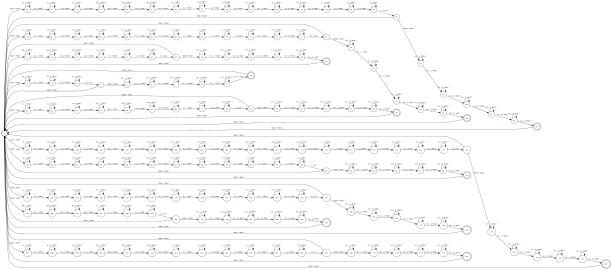

In [ ]:
wfst = MyWFST(mode='baseline', add_silence=True, add_silence_v=3)
wfst.generate()

## add silence - set next & slef & not set final > fine tune back & sil vs unigram

### sl 0.8 next 0.2 back 0.5 sil 0.5 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-1', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-1.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-1.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-1.uni.addsilv3.baseline")

- Testing - baseline7-v-1-1
- States number: 176
- Arcs number: 350
- Total errors: 1323
- Words number: 2177
- Total WER: 0.6077170418006431
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.5 sil 0.5 silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-1', use_unigram=False, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-1.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-1.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-1.addsilv3.baseline")

- Testing - baseline7-v-1-1
- States number: 176
- Arcs number: 350
- Total errors: 1327
- Words number: 2177
- Total WER: 0.6095544327055581
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.8 sil 0.2 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-2', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-2.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-2.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-2.uni.addsilv3.baseline")

- Testing - baseline7-v-1-2
- States number: 176
- Arcs number: 350
- Total errors: 1328
- Words number: 2177
- Total WER: 0.6100137804317869
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.8 sil 0.2 silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-2', use_unigram=False, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-2.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-2.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-2.addsilv3.baseline")

- Testing - baseline7-v-1-2
- States number: 176
- Arcs number: 350
- Total errors: 1333
- Words number: 2177
- Total WER: 0.6123105190629307
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.2 sil 0.8 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-3', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-3.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-3.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-3.uni.addsilv3.baseline")

- Testing - baseline7-v-1-3
- States number: 176
- Arcs number: 350
- Total errors: 1318
- Words number: 2177
- Total WER: 0.6054203031694994
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.2 sil 0.8 silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-3', use_unigram=False, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-3.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-3.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-3.addsilv3.baseline")

- Testing - baseline7-v-1-3
- States number: 176
- Arcs number: 350
- Total errors: 1322
- Words number: 2177
- Total WER: 0.6072576940744143
- The number of forward computations per wav: 160839.83333333334

## fine tune back sil pair

### sl 0.8 next 0.2 back 0.1 sil 0.9 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-4', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-4.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-4.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-4.uni.addsilv3.baseline")

- Testing - baseline7-v-1-4
- States number: 176
- Arcs number: 350
- Total errors: 1307
- Words number: 2177
- Total WER: 0.600367478180983
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.01 sil 0.99 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1297
- Words number: 2177
- Total WER: 0.5957740009186955
- The number of forward computations per wav: 160839.83333333334

## fine tune self next pair

### sl 0.9 next 0.1 back 0.01 sil 0.99 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-2-3', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-2-3.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-2-3.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-2-3.uni.addsilv3.baseline")

- Testing - baseline7-v-2-3
- States number: 176
- Arcs number: 350
- Total errors: 1304
- Words number: 2177
- Total WER: 0.5989894350022967
- The number of forward computations per wav: 160839.83333333334

### sl 0.99 next 0.01 back 0.01 sil 0.99 unigram silence

In [ ]:
wfst = MyWFST(mode='baseline7-v-2-4', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-2-4.uni.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-2-4.uni.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-2-4.uni.addsilv3.baseline")

- Testing - baseline7-v-2-4
- States number: 176
- Arcs number: 350
- Total errors: 1336
- Words number: 2177
- Total WER: 0.6136885622416169
- The number of forward computations per wav: 160839.83333333334

## fine tune sil final weight

### sl 0.8 next 0.2 back 0.01 sil 0.99 unigram silence - sil final weight = 0.5 sil back weight = 0.5

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5-f-1', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5-f-1.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-5-f-1.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5-f-1.addsilv3.baseline")

- Testing - baseline7-v-1-5-f-1
- States number: 176
- Arcs number: 350
- Total errors: 1297
- Words number: 2177
- Total WER: 0.5957740009186955
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.01 sil 0.99 unigram silence - sil final weight = 0.8 sil back weight = 0.2

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5-f-2', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5-f-2.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-5-f-2.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5-f-2.addsilv3.baseline")

- Testing - baseline7-v-1-5-f-2
- States number: 176
- Arcs number: 350
- Total errors: 1292
- Words number: 2177
- Total WER: 0.5934772622875517
- The number of forward computations per wav: 160839.83333333334

### sl 0.8 next 0.2 back 0.01 sil 0.99 unigram silence - sil final weight = 0.2 sil back weight = 0.8

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5-f-3', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5-f-3.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-5-f-3.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5-f-3.addsilv3.baseline")

- Testing - baseline7-v-1-5-f-3
- States number: 176
- Arcs number: 350
- Total errors: 1298
- Words number: 2177
- Total WER: 0.5962333486449242
- The number of forward computations per wav: 160839.83333333334

## Pruning

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 1e8)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.1e8.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.1e8.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.1e8.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 35
- Total errors: 1297
- Words number: 2177
- Total WER: 0.5957740009186955
- The number of forward computations per wav: 160839.83333333334

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 1e6)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.1e6.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.1e6.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.1e6.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1297
- Words number: 2177
- Total WER: 0.5957740009186955
- The number of forward computations per wav: 160839.83333333334

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 1e4)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.1e4.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.1e4.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.1e4.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1291
- Words number: 2177
- Total WER: 0.5930179145613229
- The number of forward computations per wav: 152647.7888888889

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 1e3)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.1e3.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.1e3.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.1e3.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1663
- Words number: 2177
- Total WER: 0.7638952687184198
- The number of forward computations per wav: 73761.38888888889

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 5e3)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.5e3.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.5e3.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.5e3.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1362
- Words number: 2177
- Total WER: 0.6256316031235646
- The number of forward computations per wav: 132481.23333333334

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 8e3)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.8e3.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.8e3.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.8e3.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1308
- Words number: 2177
- Total WER: 0.6008268259072118
- The number of forward computations per wav: 144947.22222222222

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, True, 3e3)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.3e3.pruning")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.3e3.pruning")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.3e3.baseline.pruning")

- Testing - baseline7-v-1-5
- States number: 176
- Arcs number: 350
- Total errors: 1419
- Words number: 2177
- Total WER: 0.6518144235186036
- The number of forward computations per wav: 116178.15555555555

## Beam Search

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=50)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.50.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.50.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.50.beam")

- 50 beam
- Total WER: 0.6196600826825908
- The number of forward computations per wav: 49507.677777777775

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=100)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.100.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.100.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.100.beam")

- 100 beam
- Total WER: 0.5985300872760679
- The number of forward computations per wav: 97774.78888888888

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=20)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.20.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.20.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.20.beam")

- 20 beam
- Total WER: 0.6821313734497014
- The number of forward computations per wav: 19227.533333333333

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=80)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.80.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.80.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.80.beam")

- 80 beam
- Total WER: 0.6045016077170418
- The number of forward computations per wav: 78628.67777777778

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=10)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.10.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.10.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.10.beam")

- 10 beam
- Total WER: 0.8093706936150666
- The number of forward computations per wav: 9078.31111111111

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=40)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.40.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.40.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.40.beam")

- 40 beam
- Total WER: 0.639871382636656
- The number of forward computations per wav: 39661.055555555555

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=30)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.30.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.30.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.30.beam")

- 30 beam
- Total WER: 0.6504363803399174
- The number of forward computations per wav: 29507.255555555555

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=60)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.60.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.60.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.60.beam")

- 60 beam
- Total WER: 0.6109324758842444
- The number of forward computations per wav: 59401.46666666667

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=70)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.70.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.70.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.70.beam")

- 70 beam
- Total WER: 0.6054203031694994
- The number of forward computations per wav: 69159.41111111111

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_unigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=90)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.uni.addsilv3.baseline.90.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.uni.addsilv3.baseline.90.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.uni.addsilv3.baseline.90.beam")

- 90 beam
- Total WER: 0.6017455213596693
- The number of forward computations per wav: 88210.4

## Bigram

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_bigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
output_wfst('baseline7-v-1-5.bi.addsilv3', f_baseline)

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=70)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.bi.addsilv3.baseline.70.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.bi.addsilv3.baseline.70.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.bi.addsilv3.baseline.70.beam")

- 70 beam bigram
- Testing - baseline7-v-1-5
- States number: 196
- Arcs number: 460
- Total errors: 1329
- Words number: 2177
- Total WER: 0.6104731281580156
- The number of forward computations per wav: 58598.066666666666

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_bigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.bi.addsilv3.baseline")
save_list(words_count_list, "words_count_list.7-v-1-5.bi.addsilv3.baseline")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.bi.addsilv3.baseline")

- No beam search bigram
- Testing - baseline7-v-1-5
- States number: 196
- Arcs number: 460
- Total errors: 1293
- Words number: 2177
- Total WER: 0.5939366100137804
- The number of forward computations per wav: 160839.83333333334

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_bigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=50)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.bi.addsilv3.baseline.50.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.bi.addsilv3.baseline.50.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.bi.addsilv3.baseline.50.beam")

- 50 beam bigram
- Testing - baseline7-v-1-5
- States number: 196
- Arcs number: 460
- Total errors: 1380
- Words number: 2177
- Total WER: 0.6338998621956822
- The number of forward computations per wav: 40130.98888888889

In [ ]:
wfst = MyWFST(mode='baseline7-v-1-5', use_bigram=True, add_silence=True, add_silence_v=3)
f_baseline = wfst.generate()
lex = wfst.get_lexicon()
word_table, phone_table, state_table = wfst.get_tables()

In [ ]:
import cProfile
import re
cProfile.run('error_list, words_count_list, forward_computations_list = test_baseline(f_baseline, wfst.mode, lex, word_table, phone_table, state_table, beam_search=True, beam_width=100)')

In [ ]:
save_list(error_list, "error_list.7-v-1-5.bi.addsilv3.baseline.100.beam")
save_list(words_count_list, "words_count_list.7-v-1-5.bi.addsilv3.baseline.100.beam")
save_list(forward_computations_list, "forward_computations_list.7-v-1-5.bi.addsilv3.baseline.100.beam")

- 100 beam bigram
- Testing - baseline7-v-1-5
- States number: 196
- Arcs number: 460
- Total errors: 1305
- Words number: 2177
- Total WER: 0.5994487827285255
- The number of forward computations per wav: 85863.22222222222

## Re Calculate by removing wrong examples

In [ ]:
def read_file_to_list(file):
    l = []
    with open(file, 'r') as f:
        for n in f:
            l.append(int(n))
    return l

In [ ]:
def remove_wrong_examples_re_calculate(exp_name, remove=True):
#     exp_name = "7-v-1-5.bi.addsilv3.baseline.100.beam"
    remove_index_list = [16, 29, 30, 37, 55, 89, 94, 149, 164]

    error_list_name = "error_list." + exp_name
    words_count_list_name = "words_count_list." + exp_name
    forward_computations_list_name = "forward_computations_list." + exp_name
    error_list = read_file_to_list(error_list_name)
    words_count_list = read_file_to_list(words_count_list_name)
    forward_computations_list = read_file_to_list(forward_computations_list_name)
    if remove:
        new_total_error = sum([error_list[i] for i in range(len(error_list)) if i not in remove_index_list])
        new_words_count = sum([words_count_list[i] for i in range(len(words_count_list)) if i not in remove_index_list])
        new_forward_computations = sum([forward_computations_list[i] for i in range(len(forward_computations_list)) if i not in remove_index_list])
    else:
        new_total_error = sum(error_list)
        new_words_count = sum(words_count_list)
        new_forward_computations = sum(forward_computations_list)

    print("Total errors: "+ str(new_total_error))
    print("Words number: "+ str(new_words_count))
    print("Total WER: "+ str(new_total_error / new_words_count))
    print("The number of forward computations per wav: "+ str(new_forward_computations / (len(forward_computations_list) - len(remove_index_list))))

In [ ]:
remove_wrong_examples_re_calculate("1.baseline", remove=False)

Total errors: 2374
Words number: 2177
Total WER: 1.0904915020670647
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("1.baseline")

Total errors: 1609
Words number: 1314
Total WER: 1.2245053272450532
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("2.baseline", remove=False)

Total errors: 1643
Words number: 2177
Total WER: 0.7547083141938448
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("2.baseline")

Total errors: 967
Words number: 1314
Total WER: 0.7359208523592086
The number of forward computations per wav: 83031.68421052632


## unigram & (self weight - next weight)

In [ ]:
remove_wrong_examples_re_calculate("2.uni.baseline", remove=False)

Total errors: 1642
Words number: 2177
Total WER: 0.754248966467616
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("2.uni.baseline")

Total errors: 965
Words number: 1314
Total WER: 0.7343987823439878
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("3.uni.baseline", remove=False)

Total errors: 1762
Words number: 2177
Total WER: 0.8093706936150666
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("3.uni.baseline")

Total errors: 1076
Words number: 1314
Total WER: 0.8188736681887366
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("4.uni.baseline", remove=False)

Total errors: 1561
Words number: 2177
Total WER: 0.7170418006430869
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("4.uni.baseline")

Total errors: 885
Words number: 1314
Total WER: 0.6735159817351598
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("5.uni.baseline", remove=False)

Total errors: 1521
Words number: 2177
Total WER: 0.6986678915939366
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("5.uni.baseline")

Total errors: 850
Words number: 1314
Total WER: 0.6468797564687976
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("6.uni.baseline", remove=False)

Total errors: 1602
Words number: 2177
Total WER: 0.7358750574184658
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("6.uni.baseline")

Total errors: 924
Words number: 1314
Total WER: 0.7031963470319634
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("7.uni.baseline", remove=False)

Total errors: 1508
Words number: 2177
Total WER: 0.6926963711529628
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("7.uni.baseline")

Total errors: 839
Words number: 1314
Total WER: 0.6385083713850838
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("8.uni.baseline", remove=False)

Total errors: 1520
Words number: 2177
Total WER: 0.6982085438677078
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("8.uni.baseline")

Total errors: 849
Words number: 1314
Total WER: 0.6461187214611872
The number of forward computations per wav: 83031.68421052632


In [ ]:
remove_wrong_examples_re_calculate("9.uni.baseline", remove=False)

Total errors: 1505
Words number: 2177
Total WER: 0.6913183279742765
The number of forward computations per wav: 115180.52631578948


In [ ]:
remove_wrong_examples_re_calculate("9.uni.baseline")

Total errors: 836
Words number: 1314
Total WER: 0.6362252663622526
The number of forward computations per wav: 83031.68421052632


## Add silence & (back weight - sil weight)

In [ ]:
remove_wrong_examples_re_calculate("7-v-1-1.addsilv3.baseline", remove=False)

Total errors: 1327
Words number: 2177
Total WER: 0.6095544327055581
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-1.addsilv3.baseline")

Total errors: 673
Words number: 1314
Total WER: 0.5121765601217656
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-2.addsilv3.baseline", remove=False)

Total errors: 1333
Words number: 2177
Total WER: 0.6123105190629307
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-2.addsilv3.baseline")

Total errors: 679
Words number: 1314
Total WER: 0.5167427701674278
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-3.addsilv3.baseline", remove=False)

Total errors: 1322
Words number: 2177
Total WER: 0.6072576940744143
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-3.addsilv3.baseline")

Total errors: 672
Words number: 1314
Total WER: 0.5114155251141552
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.addsilv3.baseline", remove=False)

Total errors: 1300
Words number: 2177
Total WER: 0.5971520440973818
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.addsilv3.baseline")

Total errors: 653
Words number: 1314
Total WER: 0.4969558599695586
The number of forward computations per wav: 121883.43859649122


## Add silence & (back weight - sil weight) & Unigram

In [ ]:
remove_wrong_examples_re_calculate("7-v-1-1.uni.addsilv3.baseline", remove=False)

Total errors: 1323
Words number: 2177
Total WER: 0.6077170418006431
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-1.uni.addsilv3.baseline")

Total errors: 671
Words number: 1314
Total WER: 0.510654490106545
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-2.uni.addsilv3.baseline", remove=False)

Total errors: 1328
Words number: 2177
Total WER: 0.6100137804317869
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-2.uni.addsilv3.baseline")

Total errors: 674
Words number: 1314
Total WER: 0.512937595129376
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-3.uni.addsilv3.baseline", remove=False)

Total errors: 1318
Words number: 2177
Total WER: 0.6054203031694994
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-3.uni.addsilv3.baseline")

Total errors: 668
Words number: 1314
Total WER: 0.5083713850837138
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-4.uni.addsilv3.baseline", remove=False)

Total errors: 1307
Words number: 2177
Total WER: 0.600367478180983
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-4.uni.addsilv3.baseline")

Total errors: 659
Words number: 1314
Total WER: 0.5015220700152208
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline", remove=False)

Total errors: 1297
Words number: 2177
Total WER: 0.5957740009186955
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline")

Total errors: 651
Words number: 1314
Total WER: 0.4954337899543379
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-2-3.uni.addsilv3.baseline", remove=False)

Total errors: 1304
Words number: 2177
Total WER: 0.5989894350022967
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-2-3.uni.addsilv3.baseline")

Total errors: 657
Words number: 1314
Total WER: 0.5
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-2-4.uni.addsilv3.baseline", remove=False)

Total errors: 1336
Words number: 2177
Total WER: 0.6136885622416169
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-2-4.uni.addsilv3.baseline")

Total errors: 688
Words number: 1314
Total WER: 0.5235920852359208
The number of forward computations per wav: 121883.43859649122


## pruning - drop 

In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e3.pruning", remove=False)

Total errors: 1663
Words number: 2177
Total WER: 0.7638952687184198
The number of forward computations per wav: 77643.567251462


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e3.pruning")

Total errors: 843
Words number: 1314
Total WER: 0.6415525114155252
The number of forward computations per wav: 73071.91812865497


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.3e3.pruning", remove=False)

Total errors: 1419
Words number: 2177
Total WER: 0.6518144235186036
The number of forward computations per wav: 122292.79532163743


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.3e3.pruning")

Total errors: 664
Words number: 1314
Total WER: 0.5053272450532724
The number of forward computations per wav: 109587.64912280702


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.5e3.pruning", remove=False)

Total errors: 1362
Words number: 2177
Total WER: 0.6256316031235646
The number of forward computations per wav: 139453.9298245614


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.5e3.pruning")

Total errors: 650
Words number: 1314
Total WER: 0.4946727549467275
The number of forward computations per wav: 118718.47953216374


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.8e3.pruning", remove=False)

Total errors: 1308
Words number: 2177
Total WER: 0.6008268259072118
The number of forward computations per wav: 152576.02339181287


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.8e3.pruning")

Total errors: 652
Words number: 1314
Total WER: 0.4961948249619482
The number of forward computations per wav: 120078.23391812865


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e4.pruning", remove=False)

Total errors: 1291
Words number: 2177
Total WER: 0.5930179145613229
The number of forward computations per wav: 160681.88304093567


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e4.pruning")

Total errors: 651
Words number: 1314
Total WER: 0.4954337899543379
The number of forward computations per wav: 121102.29239766081


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e6.pruning", remove=False)

Total errors: 1297
Words number: 2177
Total WER: 0.5957740009186955
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e6.pruning")

Total errors: 651
Words number: 1314
Total WER: 0.4954337899543379
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e8.pruning", remove=False)

Total errors: 1297
Words number: 2177
Total WER: 0.5957740009186955
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.1e8.pruning")

Total errors: 651
Words number: 1314
Total WER: 0.4954337899543379
The number of forward computations per wav: 121883.43859649122


## pruning - beam search

In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.10.beam", remove=False)

Total errors: 1762
Words number: 2177
Total WER: 0.8093706936150666
The number of forward computations per wav: 9556.116959064328


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.10.beam")

Total errors: 1027
Words number: 1314
Total WER: 0.7815829528158296
The number of forward computations per wav: 6975.251461988304


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.20.beam", remove=False)

Total errors: 1485
Words number: 2177
Total WER: 0.6821313734497014
The number of forward computations per wav: 20239.508771929824


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.20.beam")

Total errors: 825
Words number: 1314
Total WER: 0.6278538812785388
The number of forward computations per wav: 14693.380116959064


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.30.beam", remove=False)

Total errors: 1416
Words number: 2177
Total WER: 0.6504363803399174
The number of forward computations per wav: 31060.269005847953


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.30.beam")

Total errors: 755
Words number: 1314
Total WER: 0.5745814307458144
The number of forward computations per wav: 22519.356725146197


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.40.beam", remove=False)

Total errors: 1393
Words number: 2177
Total WER: 0.639871382636656
The number of forward computations per wav: 41748.47953216374


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.40.beam")

Total errors: 744
Words number: 1314
Total WER: 0.5662100456621004
The number of forward computations per wav: 30232.04678362573


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.50.beam", remove=False)

Total errors: 1349
Words number: 2177
Total WER: 0.6196600826825908
The number of forward computations per wav: 52113.34502923977


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.50.beam")

Total errors: 701
Words number: 1314
Total WER: 0.5334855403348554
The number of forward computations per wav: 37699.57894736842


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.60.beam", remove=False)

Total errors: 1330
Words number: 2177
Total WER: 0.6109324758842444
The number of forward computations per wav: 62527.85964912281


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.60.beam")

Total errors: 686
Words number: 1314
Total WER: 0.5220700152207002
The number of forward computations per wav: 45242.865497076025


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.70.beam", remove=False)

Total errors: 1318
Words number: 2177
Total WER: 0.6054203031694994
The number of forward computations per wav: 72799.38011695906


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.70.beam")

Total errors: 674
Words number: 1314
Total WER: 0.512937595129376
The number of forward computations per wav: 52668.83040935673


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.80.beam", remove=False)

Total errors: 1316
Words number: 2177
Total WER: 0.6045016077170418
The number of forward computations per wav: 82767.02923976608


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.80.beam")

Total errors: 670
Words number: 1314
Total WER: 0.5098934550989346
The number of forward computations per wav: 59846.45614035088


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.90.beam", remove=False)

Total errors: 1310
Words number: 2177
Total WER: 0.6017455213596693
The number of forward computations per wav: 92853.05263157895


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.90.beam")

Total errors: 667
Words number: 1314
Total WER: 0.5076103500761036
The number of forward computations per wav: 67145.22807017544


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.100.beam", remove=False)

Total errors: 1303
Words number: 2177
Total WER: 0.5985300872760679
The number of forward computations per wav: 102920.83040935673


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.uni.addsilv3.baseline.100.beam")

Total errors: 660
Words number: 1314
Total WER: 0.502283105022831
The number of forward computations per wav: 74449.95321637427


## Bigram

In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline", remove=False)

Total errors: 1293
Words number: 2177
Total WER: 0.5939366100137804
The number of forward computations per wav: 169305.08771929826


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline")

Total errors: 646
Words number: 1314
Total WER: 0.4916286149162861
The number of forward computations per wav: 121883.43859649122


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline.50.beam", remove=False)

Total errors: 1380
Words number: 2177
Total WER: 0.6338998621956822
The number of forward computations per wav: 42243.14619883041


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline.50.beam")

Total errors: 729
Words number: 1314
Total WER: 0.5547945205479452
The number of forward computations per wav: 30678.116959064326


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline.70.beam", remove=False)

Total errors: 1329
Words number: 2177
Total WER: 0.6104731281580156
The number of forward computations per wav: 61682.17543859649


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline.70.beam")

Total errors: 682
Words number: 1314
Total WER: 0.5190258751902588
The number of forward computations per wav: 44643.34502923977


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline.100.beam", remove=False)

Total errors: 1305
Words number: 2177
Total WER: 0.5994487827285255
The number of forward computations per wav: 90382.33918128654


In [ ]:
remove_wrong_examples_re_calculate("7-v-1-5.bi.addsilv3.baseline.100.beam")

Total errors: 661
Words number: 1314
Total WER: 0.5030441400304414
The number of forward computations per wav: 65348.771929824565
